<a href="https://colab.research.google.com/github/Annettteee/annette-colab-projects/blob/main/london_homes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [ ]:
data = pd.read_csv("/content/london_houses.csv")
data.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [ ]:
# Identify missing values
print(data.isnull().sum())

#Drop rows with any missing values
data.dropna(inplace=True)

#duplicate rows
print("\nNumber of duplicate rows before cleaning:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", data.duplicated().sum())

print("\nMissing values after cleaning:")
print(data.isnull().sum())
print("\nFirst 5 rows of cleaned data:")
print(data.head())


Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0

Missing values after cleaning:
Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64

First 5 rows of cleaned data:
                Address  Neighborhood  Bedrooms  Bathrooms  Square Meters  \
0      78 Regent Street  Notting

In [ ]:
#last 5 rows
print("\nLast 5 rows of the data:")
print(data.tail())

#rows, and columns of the data
print("\nShape of the data (rows, columns):", data.shape)

#summary of the data
print("\nConcise summary of the data:")
data.info()

#column names
print("\nColumn names:", data.columns.tolist())


print("\nDescriptive statistics for numerical columns:")
print(data.describe())


print("\nDescriptive statistics for categorical columns:")
print(data.describe(include=['O']))

# Count unique values in each column
print("\nNumber of unique values in each column:")
print(data.nunique())


# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

#drop rows with any missing values
datacleaned = data.dropna()


Last 5 rows of the data:
                   Address Neighborhood  Bedrooms  Bathrooms  Square Meters  \
995  44 Camden High Street  Westminster         1          3             81   
996          165 Park Lane       Camden         1          1             65   
997  99 Camden High Street       Camden         4          1            191   
998          155 Park Lane       Camden         5          2            131   
999       145 Baker Street   Kensington         4          2            185   

     Building Age Garden Garage  Floors   Property Type        Heating Type  \
995             4    Yes    Yes       2   Semi-Detached     Central Heating   
996            51     No     No       1       Apartment  Underfloor Heating   
997            27     No    Yes       2   Semi-Detached     Central Heating   
998             3    Yes     No       2  Detached House  Underfloor Heating   
999            53     No     No       1       Apartment    Electric Heating   

                Balcony 

In [ ]:
# Get descriptive statistics for the 'Price (£)' column
print("\nDescriptive statistics for 'Price (£)':")
print(data['Price (£)'].describe())


Descriptive statistics for 'Price (£)':
count    1.000000e+03
mean     1.840807e+06
std      8.793484e+05
min      3.866660e+05
25%      1.161400e+06
50%      1.721999e+06
75%      2.390500e+06
max      4.980000e+06
Name: Price (£), dtype: float64



Plotting a histogram for price:


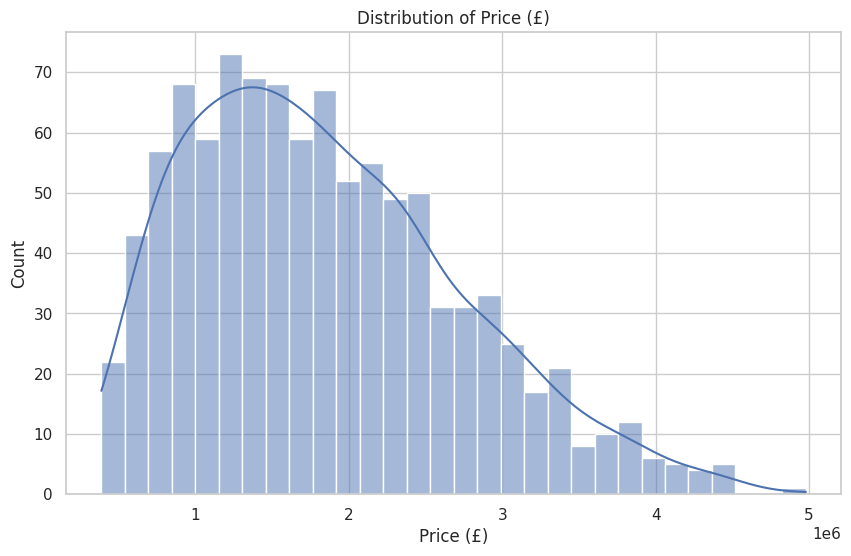


Plotting a bar plot for property type:


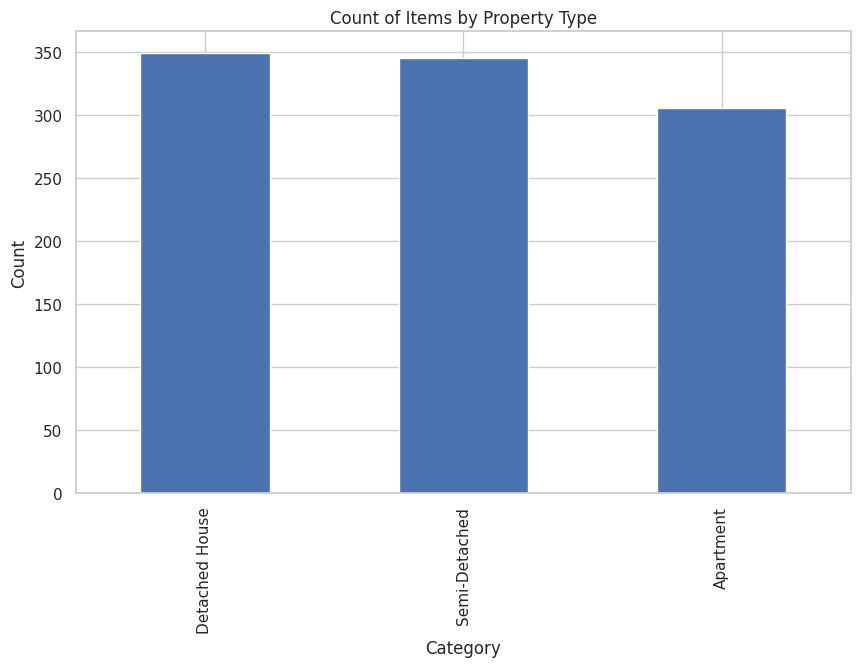


Plotting a box plot to check for outliers in 'Price (£)':


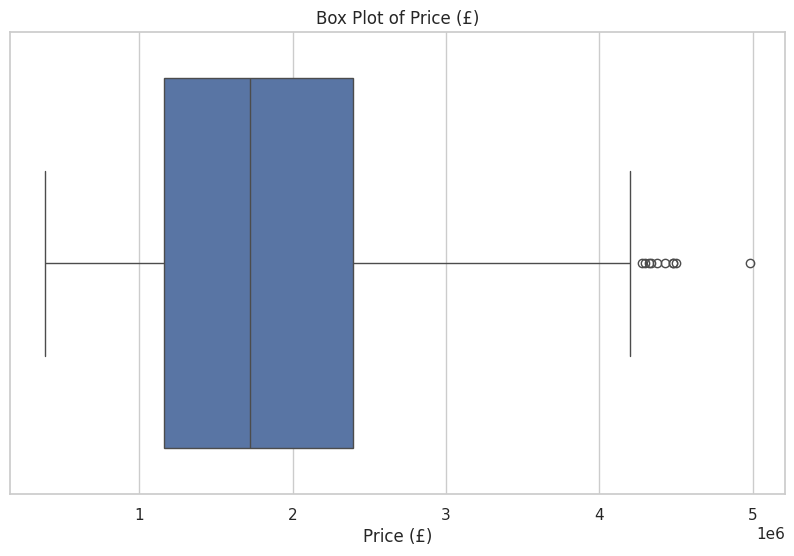


Plotting a correlation heatmap:


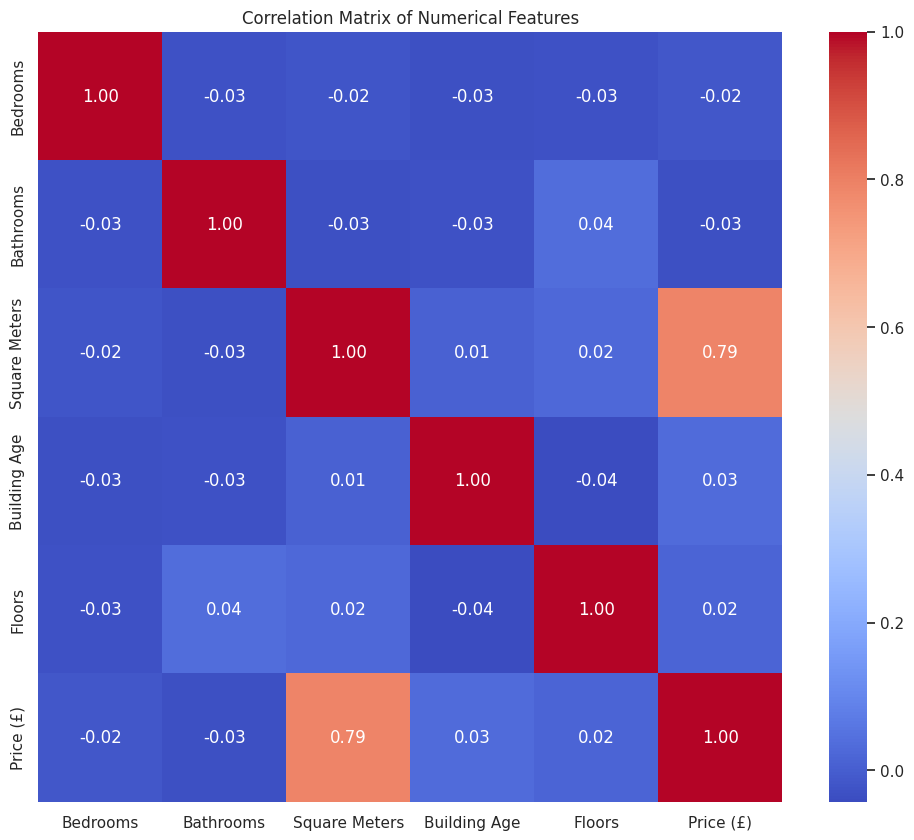


Plotting a scatter plot forPrice and number of floors:


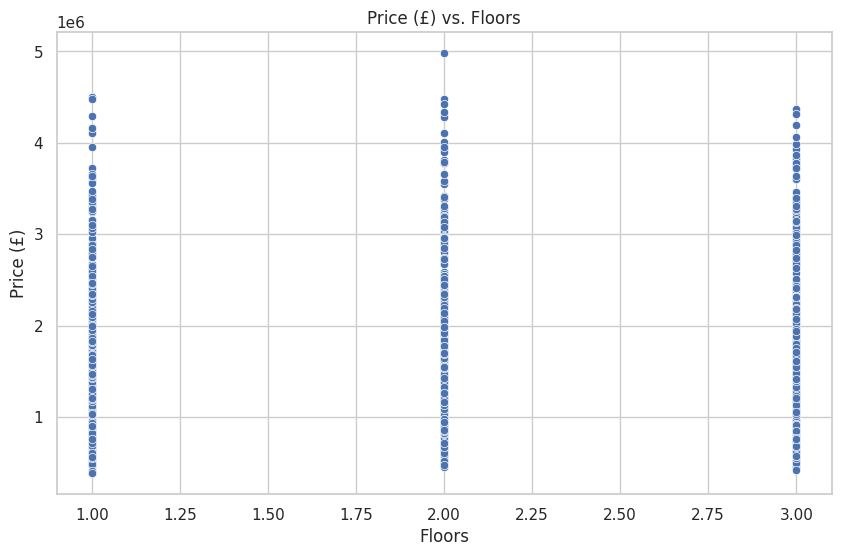


Plotting a pair plot:


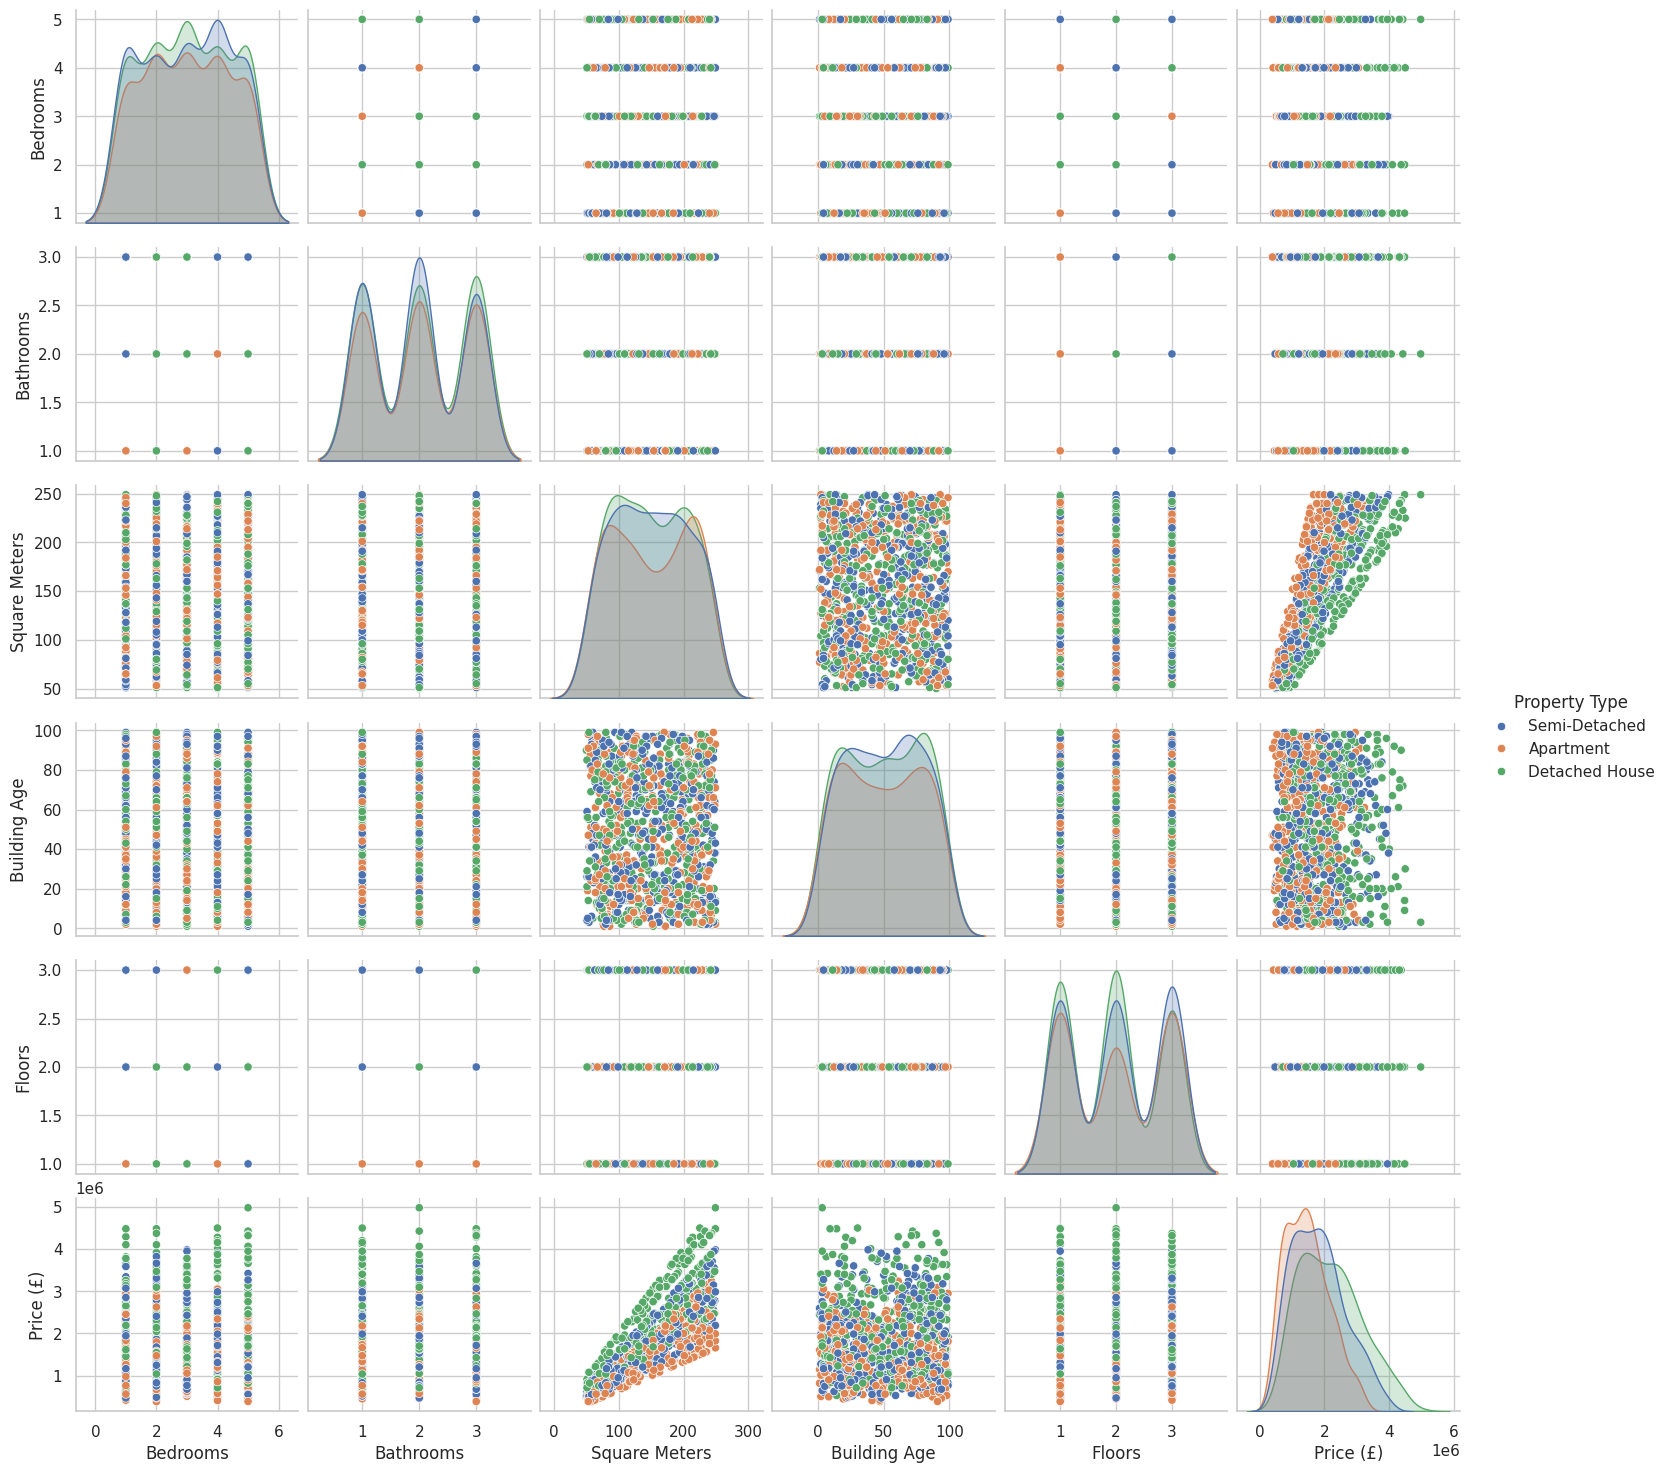

In [ ]:
sns.set_theme(style="whitegrid")

# Create a histogram for price
print("\nPlotting a histogram for price:")
plt.figure(figsize=(10, 6))
sns.histplot(data['Price (£)'], kde=True, bins=30)
plt.title('Distribution of Price (£)')
plt.show()

# Create a bar plot for a property type
print("\nPlotting a bar plot for property type:")
plt.figure(figsize=(10, 6))
data['Property Type'].value_counts().plot(kind='bar')
plt.title('Count of Items by Property Type')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Create a box plot to check for outliers
print("\nPlotting a box plot to check for outliers in 'Price (£)':")
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price (£)'])
plt.title('Box Plot of Price (£)')
plt.show()


# Create a correlation heatmap for numerical variables
print("\nPlotting a correlation heatmap:")
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Create a scatter plot for two numerical variables
print("\nPlotting a scatter plot forPrice and number of floors:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Floors', y='Price (£)', data=data)
plt.title('Price (£) vs. Floors')
plt.show()

# Create a pair plot to visualize relationships across all variables
print("\nPlotting a pair plot:")
sns.pairplot(data, hue='Property Type')
plt.show()

Coefficients from the Linear Regression Model:
                                   Coefficient
Property Type_Detached House     742648.988262
Property Type_Semi-Detached      353382.396599
Materials_Wood                   122419.128211
Materials_Laminate Flooring       82630.171203
Materials_Marble                  69070.836207
Interior Style_Modern             42552.400136
Heating Type_Gas Heating          32858.414059
Floors                            30226.988015
Garden_Yes                        27768.575078
Interior Style_Minimalist         24511.631809
Garage_Yes                        16216.710336
Square Meters                     12028.990947
Heating Type_Electric Heating      7698.670320
Bedrooms                           5780.008697
Building Age                        714.546853
Building Status_Renovated         -2384.187166
Building Status_Old              -19213.262610
Bathrooms                        -22943.416154
Heating Type_Underfloor Heating  -33299.782291
Interior Styl

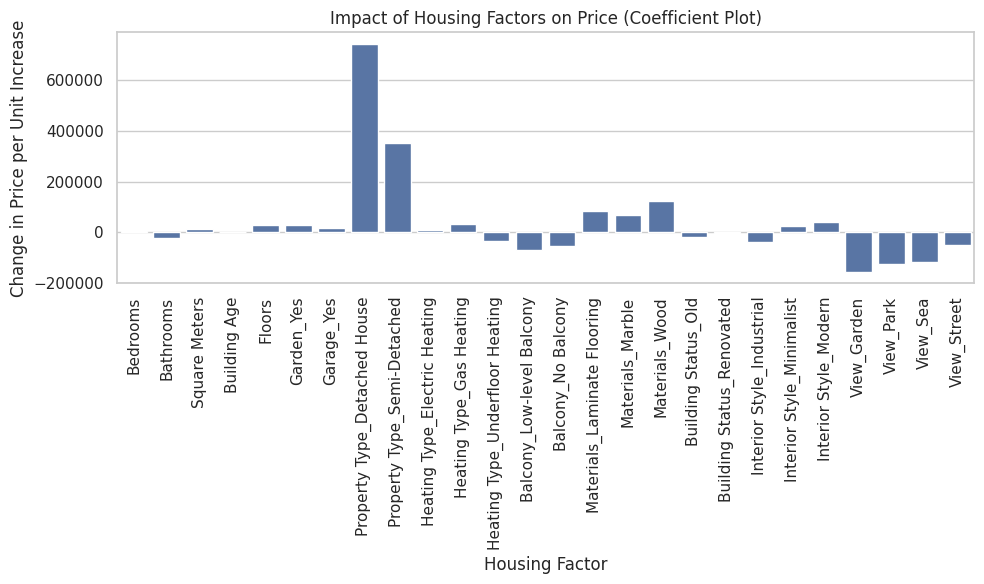


Mean Squared Error on Test Data: 211,403,522,974.29


In [ ]:
dataprocessed = pd.get_dummies(data, columns=[
    'Garden', 'Garage', 'Property Type', 'Heating Type',
    'Balcony', 'Materials', 'Building Status', 'Interior Style', 'View'
], drop_first=True) # `dropfirst=True` avoids multicollinearity

# Define features (X) and target (y)
X = dataprocessed.drop(['Price (£)', 'Address', 'Neighborhood'], axis=1)
y = dataprocessed['Price (£)']

# 3. Create and train a model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate and interpret the results
# Print the model's coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients from the Linear Regression Model:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Optional: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xticks(rotation=90)
plt.title('Impact of Housing Factors on Price (Coefficient Plot)')
plt.ylabel('Change in Price per Unit Increase')
plt.xlabel('Housing Factor')
plt.tight_layout()
plt.show()

# Predict prices and evaluate the model's performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Data: {mse:,.2f}")

In [ ]:
features = ['Bedrooms', 'Square Meters', 'Building Age', 'Garden', 'Garage', 'Floors',
            'Property Type', 'Heating Type', 'Balcony', 'Materials', 'Building Status']
target = 'Price (£)'

X = data[features]
y = data[target]


categorical_features = ['Garden', 'Garage', 'Property Type', 'Heating Type',
                        'Balcony', 'Materials', 'Building Status']
numerical_features = ['Bedrooms', 'Square Meters', 'Building Age', 'Floors']


encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X_processed = pd.concat([X[numerical_features].reset_index(drop=True), encoded_df], axis=1)

print("Processed data with one-hot encoding:")
print(X_processed.head())

Processed data with one-hot encoding:
   Bedrooms  Square Meters  Building Age  Floors  Garden_Yes  Garage_Yes  \
0         2            179            72       3         0.0         0.0   
1         2            123            34       1         1.0         0.0   
2         5            168            38       3         0.0         1.0   
3         5            237            53       1         1.0         1.0   
4         4            127            23       2         0.0         1.0   

   Property Type_Detached House  Property Type_Semi-Detached  \
0                           0.0                          1.0   
1                           0.0                          0.0   
2                           0.0                          1.0   
3                           0.0                          0.0   
4                           0.0                          1.0   

   Heating Type_Electric Heating  Heating Type_Gas Heating  \
0                            1.0                       0.0

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_processed, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(Xtrain, ytrain)

featurenames = X_processed.columns
coefficients = model.coef_

resultsdata = pd.DataFrame({'Feature': featurenames, 'Coefficient': coefficients})
resultsdata['Absolute Coefficient'] = resultsdata['Coefficient'].abs()
resultsdata = resultsdata.sort_values(by='Absolute Coefficient', ascending=False)

print("\nLinear Regression Coefficients (Impact on Price):")
print(resultsdata[['Feature', 'Coefficient']])

print("\nInterpretation:")
for index, row in resultsdata.iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']
    if coefficient > 0:
        print(f" - A positive value for '{feature}' is associated with a higher house price.")
    else:
        print(f" - A positive value for '{feature}' is associated with a lower house price.")

ypred = model.predict(Xtest)
mse = mean_squared_error(ytest, ypred)
print(f"\nMean Squared Error on Test Data: {mse:,.2f}")


Linear Regression Coefficients (Impact on Price):
                            Feature    Coefficient
6      Property Type_Detached House  738413.591411
7       Property Type_Semi-Detached  350275.998488
15                   Materials_Wood  119080.434976
13      Materials_Laminate Flooring   79955.981607
14                 Materials_Marble   71030.160000
11        Balcony_Low-level Balcony  -65524.473459
12               Balcony_No Balcony  -38692.711193
10  Heating Type_Underfloor Heating  -31891.830934
9          Heating Type_Gas Heating   31825.626655
5                        Garage_Yes   23422.237800
3                            Floors   23293.812553
4                        Garden_Yes   21107.545231
1                     Square Meters   12072.478314
16              Building Status_Old   -8513.310159
8     Heating Type_Electric Heating    6975.516157
0                          Bedrooms    6334.284596
17        Building Status_Renovated   -2593.660519
2                      Building

In [ ]:
model = LinearRegression()

# Step 2: Train the model using the processed data
model.fit(X_processed, y)

featurenames = X_processed.columns
coefficients = model.coef_

# Step 2: Create a DataFrame to clearly display the results
resultsdata = pd.DataFrame({'Feature': featurenames, 'Coefficient': coefficients})
resultsdata['Absolute Coefficient'] = resultsdata['Coefficient'].abs()
resultsdata = resultsdata.sort_values(by='Absolute Coefficient', ascending=False)

print("\nLinear Regression Coefficients (Impact on Price):")
print(resultsdata[['Feature', 'Coefficient']])

print("\nInterpretation:")
for index, row in resultsdata.iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']
    if coefficient > 0:
        print(f" - A positive value for '{feature}' is associated with a higher house price.")
    else:
        print(f" - A positive value for '{feature}' is associated with a lower house price.")


Linear Regression Coefficients (Impact on Price):
                            Feature    Coefficient
6      Property Type_Detached House  742458.316038
7       Property Type_Semi-Detached  346887.825740
15                   Materials_Wood  121082.845288
13      Materials_Laminate Flooring   79728.491975
14                 Materials_Marble   72295.387100
11        Balcony_Low-level Balcony  -44006.224738
12               Balcony_No Balcony  -40630.116928
9          Heating Type_Gas Heating   37767.705389
4                        Garden_Yes   30188.789119
10  Heating Type_Underfloor Heating  -24949.687874
8     Heating Type_Electric Heating   18466.031479
17        Building Status_Renovated   14874.241865
1                     Square Meters   12047.145733
3                            Floors   10532.993432
16              Building Status_Old    6001.558514
2                      Building Age     596.411126
5                        Garage_Yes    -258.479987
0                          Bedr